# 🗂️ **S3 - Object Store**

Se trata de um **object store**

O S3 é composto por:

+ **buckets**;
    + devem ter seu nome único em todas AWS
+ **objects**;
+ **sub-recursos relacionados**.

Podemos ter **buckets versionados**, que consistem em buckets cujos objetos e alterações feitas são versionadas """como se fosse um Git"""

# 🔐 **Políticas de Acesso**

As **politicas** de acesso do S3 podem ser categorizadas em 2 diferentes tipos:

+ **resource-based policies** (baseada em recursos)
    + permissões específicas para cada recurso;
    + aqui se enquadram:
        + **bucket policies**;
            + **as políticas do bucket se aplicam a seus objetos**;
            + podem ser definidas com base em:
                + **operações** no S3;
                + tipo de **requestor**;
                + **tipo de resource**;
                + **natureza do request**.
            + podemos tornar a **permissão granular em termos de intervalo de tempo e** de Classless Inter-Domain Routing (**CIDR**);

        + access-control list (**ACL**).
            + **permite dar permissão para outras contas ou usuários em outras contas;**
            + são capazes de prover **somente** permissões de **leitura e escrita** num dado Bucket;
            + **uteis para gerenciamento numa granularidade de objects**.

+ **user policies** (baseada em usuários)
    + **mais recomendada que ACL**;
    + nesse modo de permissão podemos conceder a roles e users do IAM acesso a objects para processamento e analise de dados via serviços e ferramentas;
    + **são associadas ao IAM**;
    + **com IAM podemos criar users, roles e groups em contas e atrelar a eles policies do S3**.

Apesar dos diferentes modos de garantir segurança por meio de policies, é importante reforçar usando **KMS**, desse modo podemos evitar que **users inesperados e indesejados** que conseguiram acesso a um dado recurso do S3 **nao podem operar sobre os mesmos**

**normalmente é realizado o uso conjunto dos dois tipos**

# ✨ **Principais Benefícios**

O S3 tem como **principais beneficios**:

+ **escalabilidade**;
    + podemos armazenar quantos objetos/objects necessários    

+ **segurança**;
    + todos os componentes do S3 são, **por padrão, privados**, isto é, para acessá-los o usuário/serviço deve ter a devida permissão

+ **durabilidade**
    + os dados são protegidos contra perda de dados em 99.999999999% (11 9's)

+ **disponibilidade**
    + isso se deve ao **sharding e replication** que ele executa como backend
    + durante o armazenamento de um objeto num Bucket os seguintes procedimentos são realizados:
        1.  o dado é fragmentado em porções menores (**sharding**);
        2.  esses fragmentados podem então serem duplicados (**replications**) e armazenados em mais de uma AZ, garantindo consistência e resiliência;
    + **se por ventura um dos silos de armazenamento cair, podemos ainda ter os dados devidos ao sharding e replications.**

# 💰 **Estrutura de Custo**

Seu custo é baseado em:
    + na quantidade de objetos armazenados nele em termos de **memória**;
    + **numero de requests** (PUT, GET e DELETE) feitos ao bucket;
    + **transferência** de dados;
    + **versionamento**;
    + **replicação**;
    + dentre outros.

Podemos gerenciar **lifecycles** de objetos tornando seu **custo mais otimizado**

# 🔄 **Lifecycles**

Lifecycles são **politicas de gerenciamento** (definidas nativamente no formato XML) de persistência e de modos de armazenamento de objetos dentro do S3

Por meio de **lifecycles** podemos mover dados pouco acessados para serviços oferecidos pelo S3 como o **S3 Glacier**, camada de dados frios

As **lifecycles** podem atuar com base em:
+ **datas**; 
+ **nomes** de objects;
+ **tags**.

Lifecycles podem ser de duas naturezas:
+ **transição**
    + faz a **movimentação** de objetos para níveis mais adequados quanto a custo;
    + podemos pontuar como outros níveis de armazenamento (**Storage Classes**) o S3 **Standard**, S3 **Standard-IA**, S3 **One Zone-IA**, S3 **Glacier Instant Retrieval**, S3 **Glacier Flexible Retrieval**, S3 **Glacier Deep Archive** e S3 **Intelligent Tiering**

+ **expiração**
    + deleta dados que não temos interesse em manter o historico
    + quando feita a deleção, os objetos são marcados com um **delete marker** em **buckets versionados**
    + para **restaurar** esses objetos podemos **deletar seu delete marker**, dessa forma a **versão mais recente anterior à do delete marker é restaurada**

# 🌍 **S3 Cross-Region Replication**

O S3 oferece uma funcionalidade nativa nomeada de **S3 Cross-Region Replication**
+ ela permite que os dados sejam disponibilizados de modo assíncrono em outras regiões, reforçando a durabilidade;
+ todos os dados são criptografados durante este trânsito usando SSL, garantindo o mais alto nível de segurança.

# 🔒 **S3 Object Lock**

Outra feature do S3 é a **S3 Object Lock**
+ esta feature permite ao usuário escrever objetos no S3 usando o **modelo WORM (Write Once Read Many)**

# 🏷️ **Gerenciamento via Tags**

Uma forma de gerenciamento de objects dentro do S3 é via uso de **Tags**

O processo de tagging do S3 permite que **cada object** tenha, **no máximo, 10 tags**

**Tags são pares key-value que são mutáveis**

+ cada key pode ter no máximo 128 Unicodes
+ cada value pode ter no máximo 256 Unicodes

**Tags podem ser usadas, por exemplo, no controle de *lifecycle***

**O uso de tags brilha quando feito junto do IAM**
+ em cenários como esse, o **IAM pode controlar permissões por meio das tags**

**Tags** podem ser combinadas com o **Amazon CloudWatch Metrics e AWS CloudTrail** para **facilitar** no **gerenciamento e auditoria de dados**

Na tabela abaixo podemos ter exemplos de Tags recomendadas pela AWS

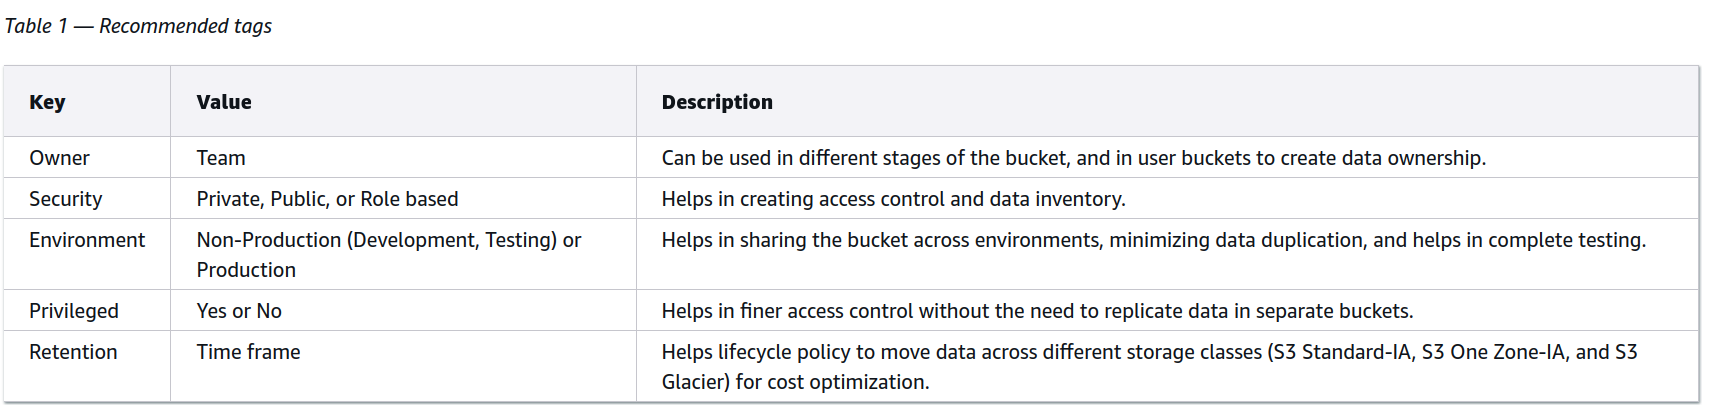

# 🗃️ **S3 Storage Class**

são camadas específicas de tipos de bucket do S3 que podem ser utilizadas para **otimizar custo, performance** e ainda estar de acordo com políticas de **compliance** como por exemplo **LGPD**

## *S3 Standard*

Se tratam de Buckets generalistas (**General Purpose Buckets**) usados para **acessar dados frequentes**

## *S3 Standard Infrequent Access (S3 Standard-IA)*

São usados para dados pouco frequentes e de grande duração

## *S3 One Zone Infrequent Access (S3 One Zone – IA)*

São usados para dados pouco frequentes e de grande duração

## *S3 Intelligent-Tiering*

São usados para **otimizar o armazenamento e custo movendo automaticamente os objects dentro dos buckets** de acordo com os **padrões** de **acesso** dentro de um período de **30 dias**

É recomendado em casos onde os **padrões de acesso são imprevisíveis**

**Atua de modo independente do tipo, tamanho e tempo de retenção**

Faz uso de dois tipos de acesso de baixa latência:

+ Dados frequentemente acessados;

+ Dados pouco acessados.

**Se dados da camada de "Dados pouco acessados" forem consultados, estes são movidos automaticamente para a camada de "Dados frequentemente acessados"**

Podemos configurar essa classe para mover dados num **período de 90 dias** para uma **camada S3 Intelligent-Tiering Archive**

Podemos fazer com que estes dados na camada de arquivados sejam ainda movidos para uma camada de **S3 Intelligent Tiering Deep Archive num período de 180 dias**

**Esses intervalos de tempo podem ser alterados até no máximo 730 dias**

**O S3 Intelligent-Tiering Archive tem a mesma performance do S3 Glacier**

**O S3 Intelligent-Tiering Deep Archive tem a mesma performance do S3 Glacier Deep Archive**

## *S3 Storage Lens*

Nos fornece um modo de observabilidade do armazenamento de objects

**Permite observar métricas, linhas de tendência e insights acionáveis**

**Podemos gerar insights de métricas a nivel de organização, conta, região, bucket e prefixos**

## *S3 Glacier*

Uma ferramenta de **armazenamento de baixo custo**

Nos fornece armazenamento durável

**Possui suporte de lifecycle**

Recomendado em casos onde os **dados são pouco usados**

Temos dois tipos de Glacier:

+   **S3 Glacier/S3 Glacier Archive**

+   **S3 Glacier Deep Archive**

# S3 Tables

se trata de uma forma de se armazenar **dados tabulares de forma mais eficiente e escalável dentro do S3**

os buckets do S3 foram criados com o intuito de armazenar objetos diversos de aplicações

o S3 Tables introduz o tipo de bucket denominado de **Table Bucket**

para falarmos de S3 Tables precisamos conhecer a **arquitetura do Apache Iceberg**

## Apache Iceberg

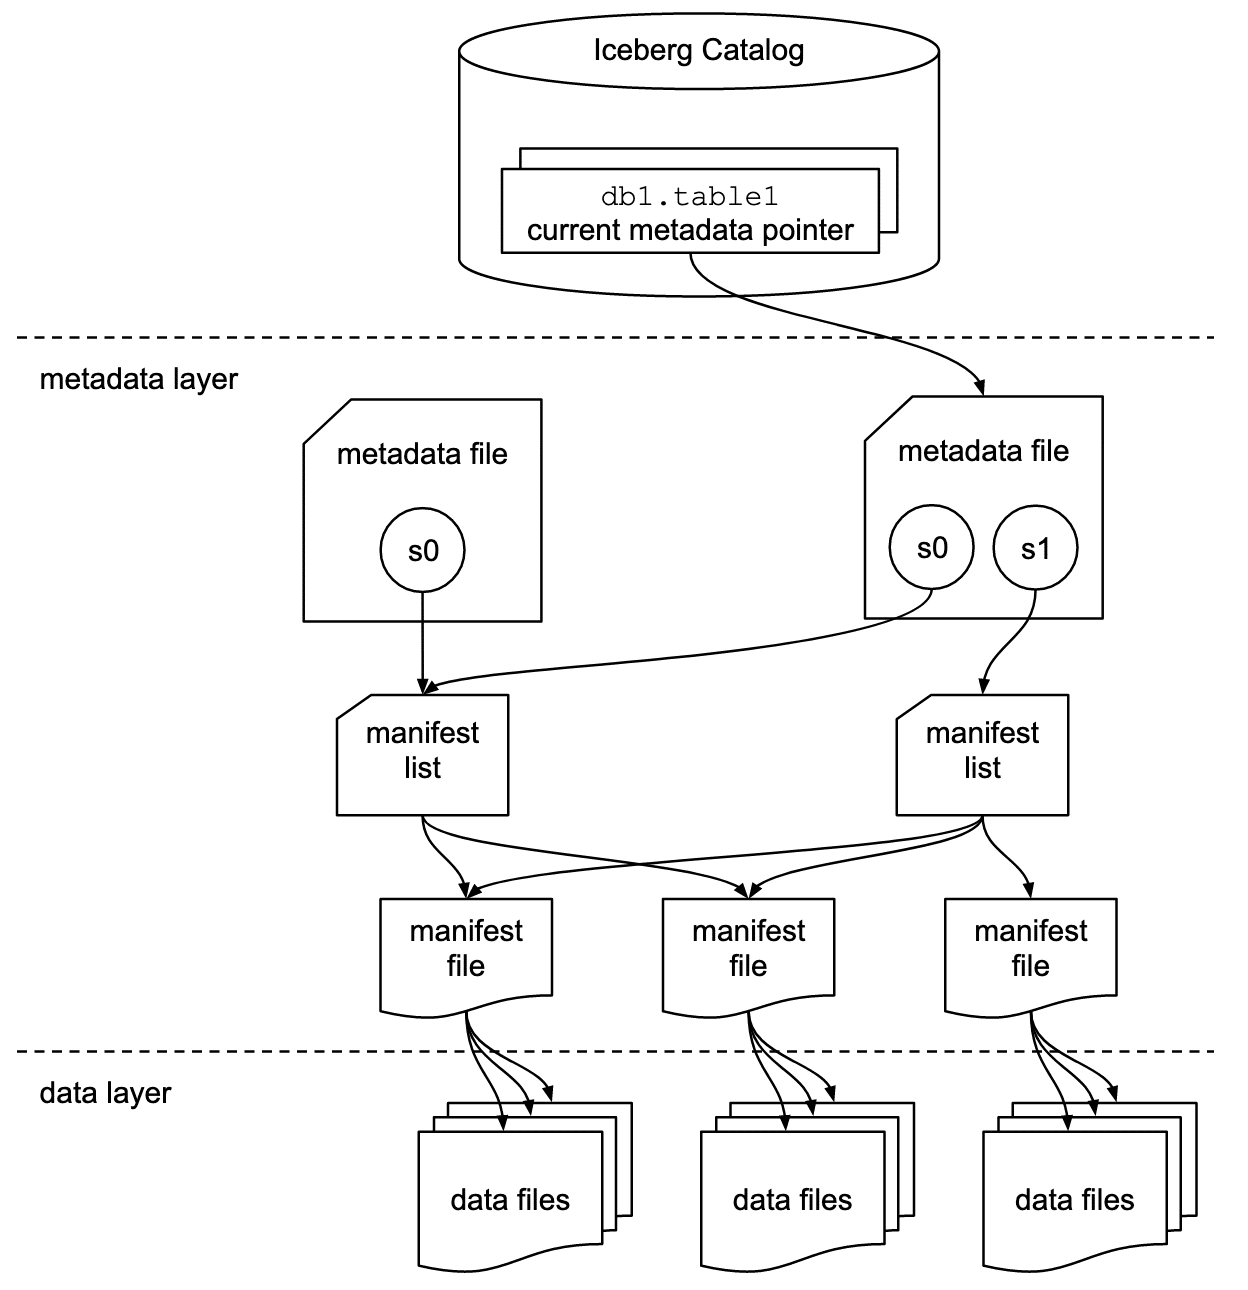

consiste nos seguintes **componentes**:

+ **Iceberg Catalog**
    + armazena o "pointer" (ponteiro) que **aponta para a camada de metadados** mais externa (nesse caso, Metadata File);
    + **permite**, com a criação de um novo Metadata File, seja por criação de uma coluna por exemplo, **alterar o schema de modo flexível sem perder o histórico**;
    + as transações devem obedecer o **ACID**.

+ **Metadata File**
    + pertence à **camada de metadados**;
    + armazena **metadados da tabela** em um momento (dia, hora, etc).

+ **Manifest List**
    + pertence à **camada de metadados**;
    + organizam os Manifest Files em listas;
    + **armazenam informações sobre os Manifest Files**
    + localização, partições, etc

+ **Manifest File**
    + pertence à **camada de metadados**;
    + **rastreiam metadados de Data Files**;
    + contém **estatísticas a respeito dos dados** que tornam mais ágeis consultas.

+ **Data Files**
    + aqui residem os **Parquets** cujos dados de nosso interesse estão.

com o uso constante por usuários de armazenamento de dados tabulares (Parquet, ORC, etc) o S3 Tables surgiu como uma **forma mais eficiente** de:

+ **gerenciar** estes **dados tabulares** e seus respectivos **metadados**;
+ **gerenciar permissões e segurança**;
+ **otimiza os custos**.

**benefícios** de seu uso se comparado a General Buckets:

+ **10x mais veloz em performance** de ferramentas analíticas (**Athena, EMR, Glue, etc**);
+ 
+ sua **compactação minimiza** o problema de **small files**; 
+ tabelas tem seu **próprio ARN**;
+ **cada tabela pode ter sua Policy**;
+ tem um **endpoint** da API da AWS **dedicado** aos Table Buckets (**s3tables.region.amazonaws.com**)
    + com este endpoint podemos operar em **dois graus de granularidade** sobre nosso Table Bucket:
        1. **A nivel de Table Bucket (Table Management)**
        2. **A nivel de Tabela (Table Operations)**
        
        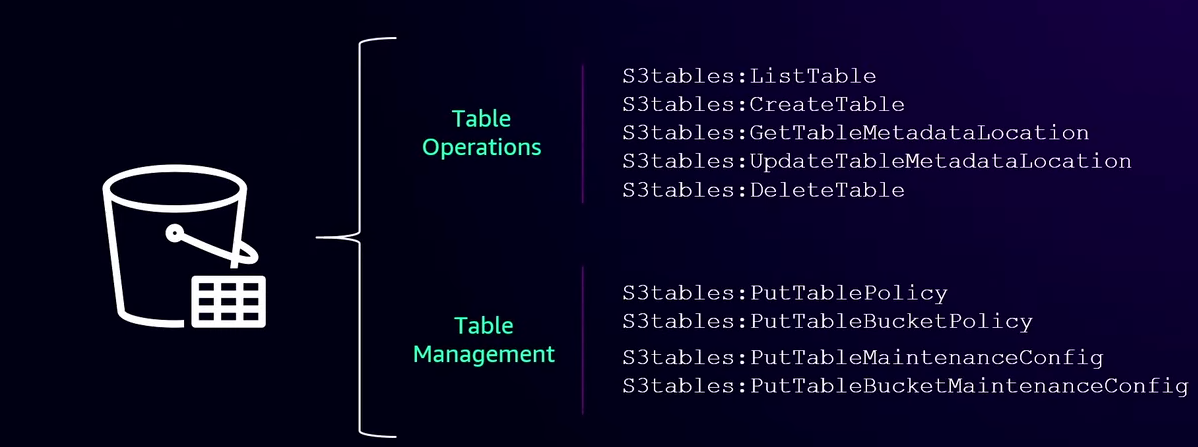

+  **cada tabela tem sua localização, agilizando queries**;
